# DTree Classifer Demonstration

In this tutorial we will demonstrate how to use the `DecisionTreeClassifer` class in `scikit-learn` to perform classifications predictions. 


## 1.0 Setup
Import modules


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


np.random.seed(1)

## 2.0 Load data
Load data (it's already cleaned and preprocessed)


In [17]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
#import os
#print(os.getcwd())

In [4]:
X_train = pd.read_csv('./data/airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('./data/airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('./data/airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('./data/airbnb_test_y_price_gte_150.csv') 

## NOTE: In this next section, GridSearch will use K Fold Cross Validation 

K-Fold cross validation is used to avoid overfitting. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


## 3.0 Model the data

### 3.1 Fit a DTree classification model using Grid Search (paramater tuning set 1)

In [7]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': [1,10,50,100,200],  
    'min_samples_leaf': [1,5,10,20,50],
    'min_impurity_decrease': [0.0001, 0.0005, 0.0010, 0.0020, 0.0050],
    'max_leaf_nodes': [10,25,50,100,200], 
    'max_depth': [5,10,20,30], 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
The best accuracy score is 0.8593213901885207
... with parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 1}


In [20]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.3f} Precision={TP/(TP+FP):.3f} Recall={TP/(TP+FN):.3f} F1={2*TP/(2*TP+FP+FN):.3f}")

Accuracy=0.846 Precision=0.838 Recall=0.857 F1=0.847


## 5.0 Importance of features

In [21]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.03, 0.1 , 0.79, 0.  , 0.  , 0.06, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## 6.0 Diagrams of DTrees

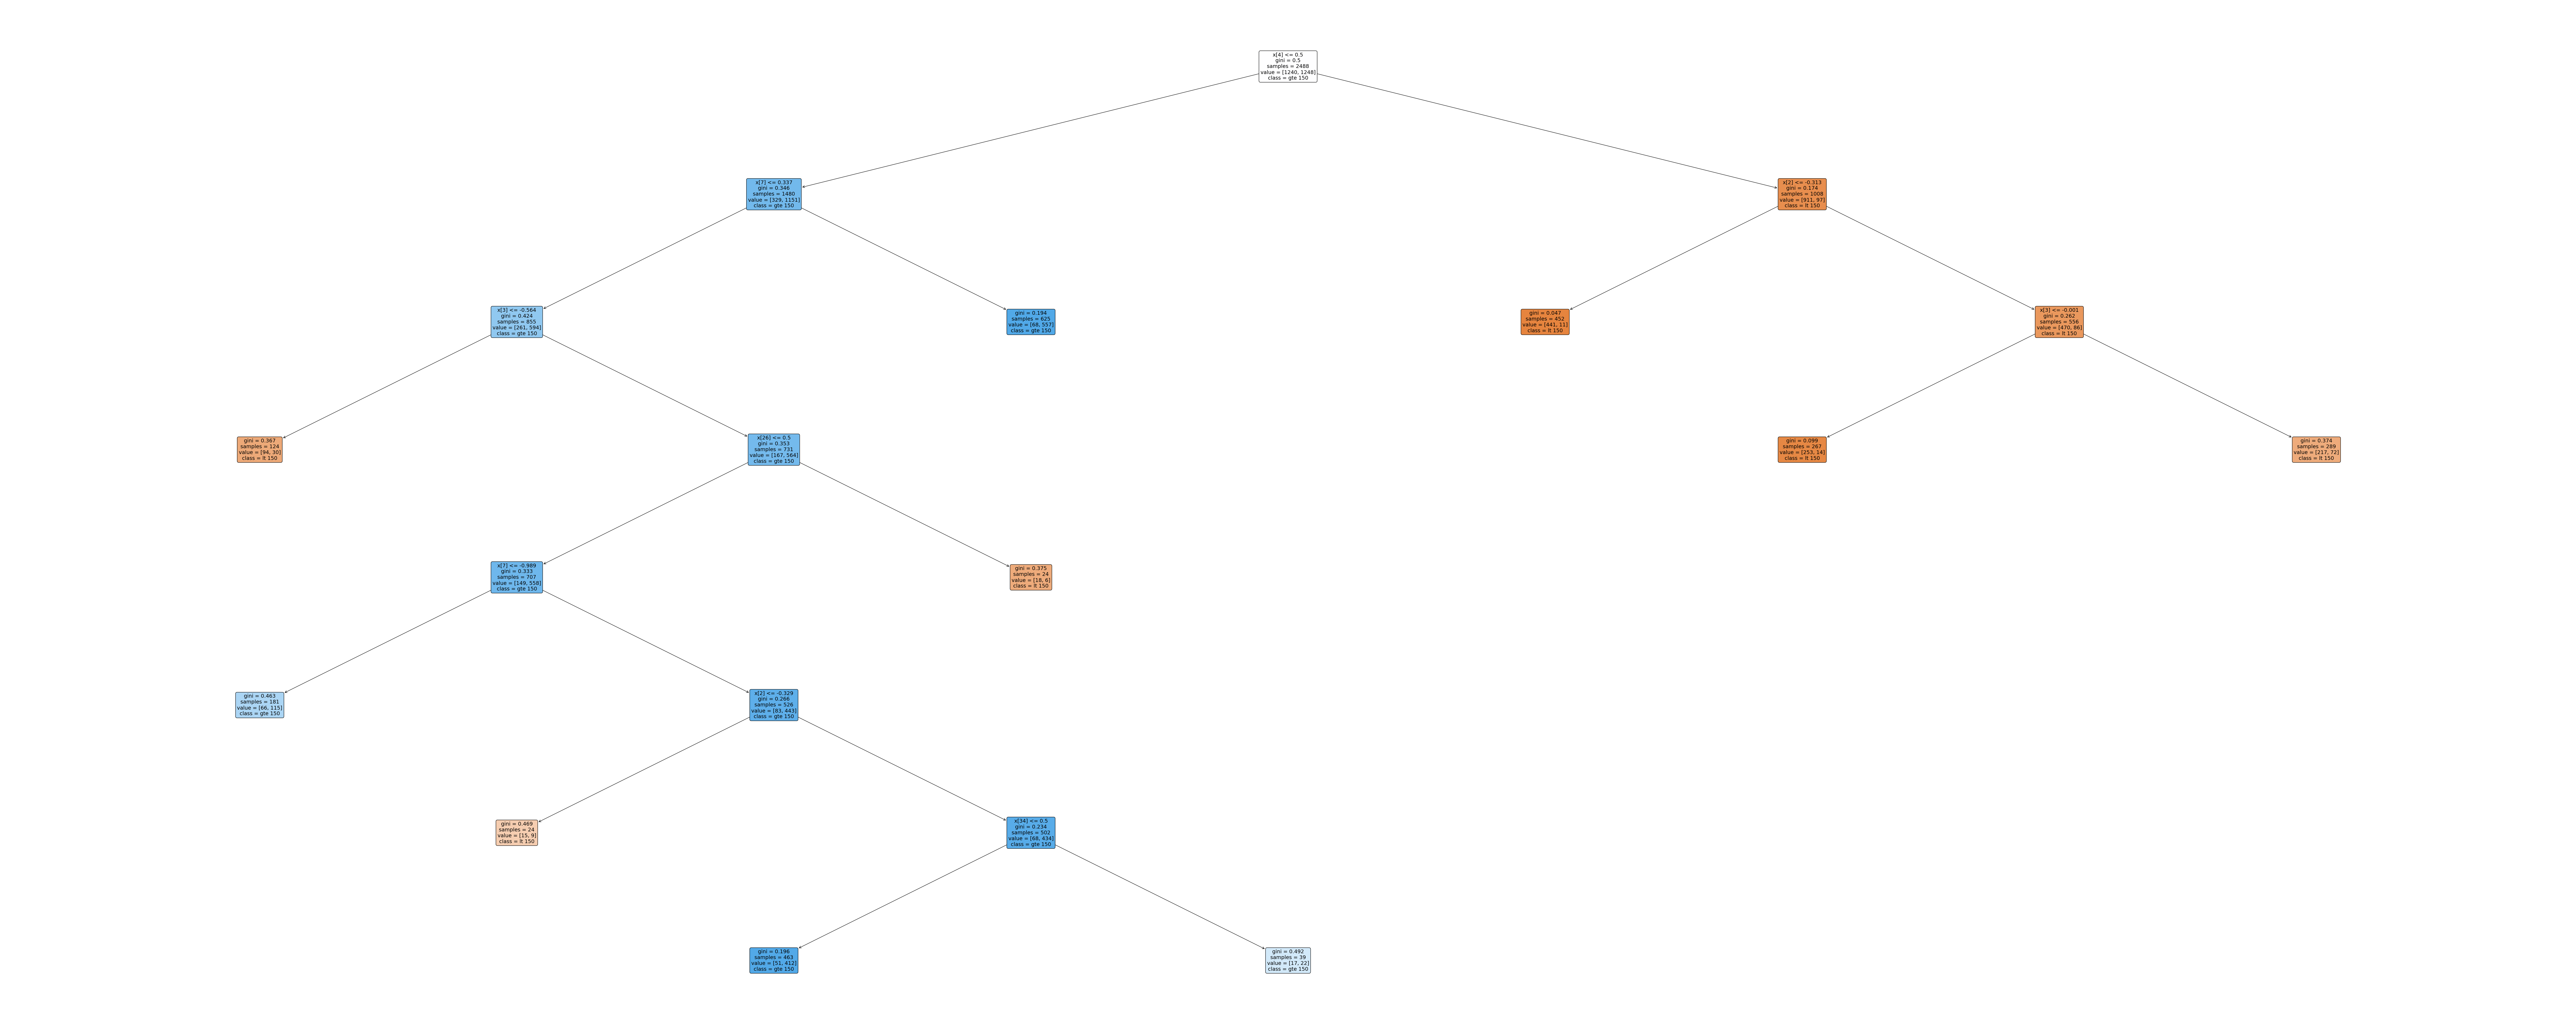

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)